NOTEBOOK 
Evaluating Machine Learning Models for Corporate Bankruptcy Prediction using Data Balancing Techniques and Hyperparameter Tuning

In [1]:
from framework_Final import (
    AnalisisDatosExploratorio, 
    NoSupervisados, 
    Supervisado, 
    evaluador
)
import pandas as pd
import numpy as np

# === ANÁLISIS DE CLUSTERING ===
# Configuración y análisis inicial


Información del dataset después del preprocesamiento:
Dimensiones: (440, 440)

Tipos de datos de las columnas:
Net_Income_to_Total_Assets,ROA(A)_before_interest_and_%_after_tax,ROA(B)_before_interest_and_depreciation_after_tax,ROA(C)_before_interest_and_depreciation_before_interest,Net_worth/Assets,Debt_ratio_%,Persistent_EPS_in_the_Last_Four_Seasons,Retained_Earnings_to_Total_Assets,Net_profit_before_tax/Paid-in_capital,Per_Share_Net_profit_before_tax_(Yuan_¥),Current_Liability_to_Assets,Working_Capital_to_Total_Assets,Net_Income_to_Stockholder's_Equity,Borrowing_dependency,Current_Liability_to_Current_Assets,Liability_to_Equity,Net_Value_Per_Share_(A),Net_Value_Per_Share_(B),Net_Value_Per_Share_(C),Current_Liability_to_Equity,Current_Liabilities/Equity,Working_Capital/Equity,Operating_Profit_Per_Share_(Yuan_¥),Operating_profit/Paid-in_capital,Liability-Assets_Flag,Total_expense/Assets,Equity_to_Long-term_Liability,CFO_to_Assets,Tax_rate_(A),Cash/Total_Assets,Gross_Profit_to_Sales,Op

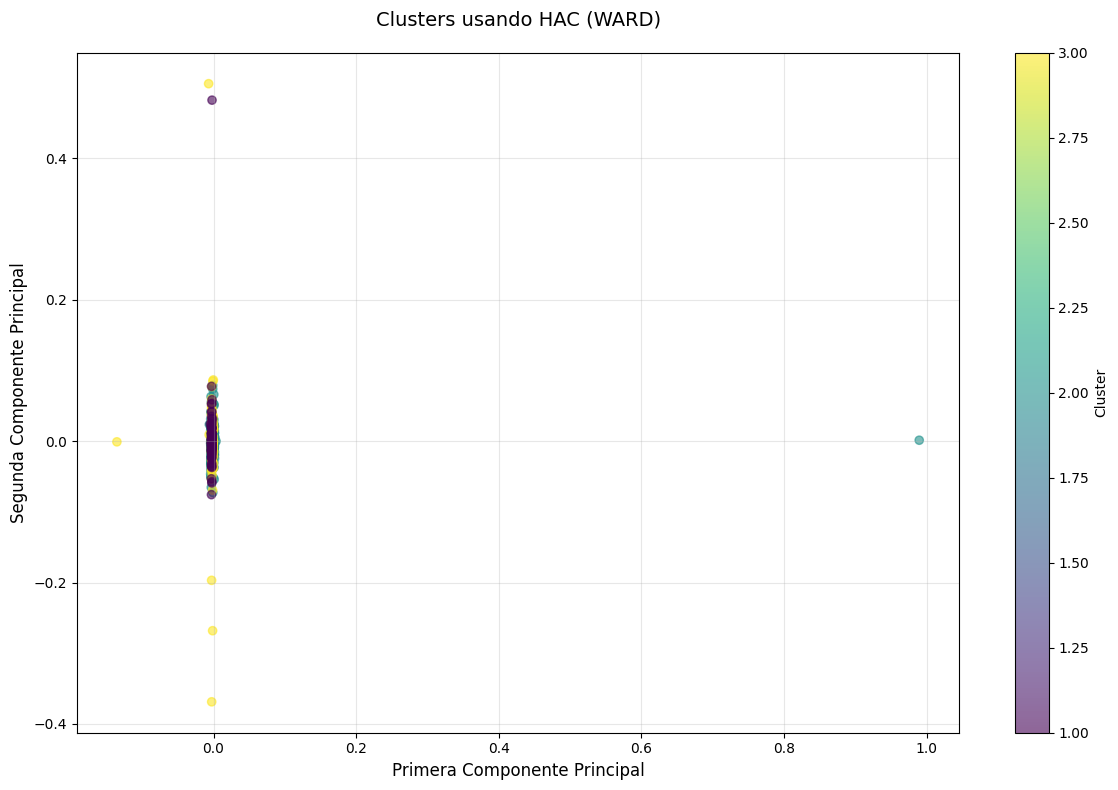


Número de elementos en cada cluster (ward):
2    170
3    170
1    100
Name: count, dtype: int64


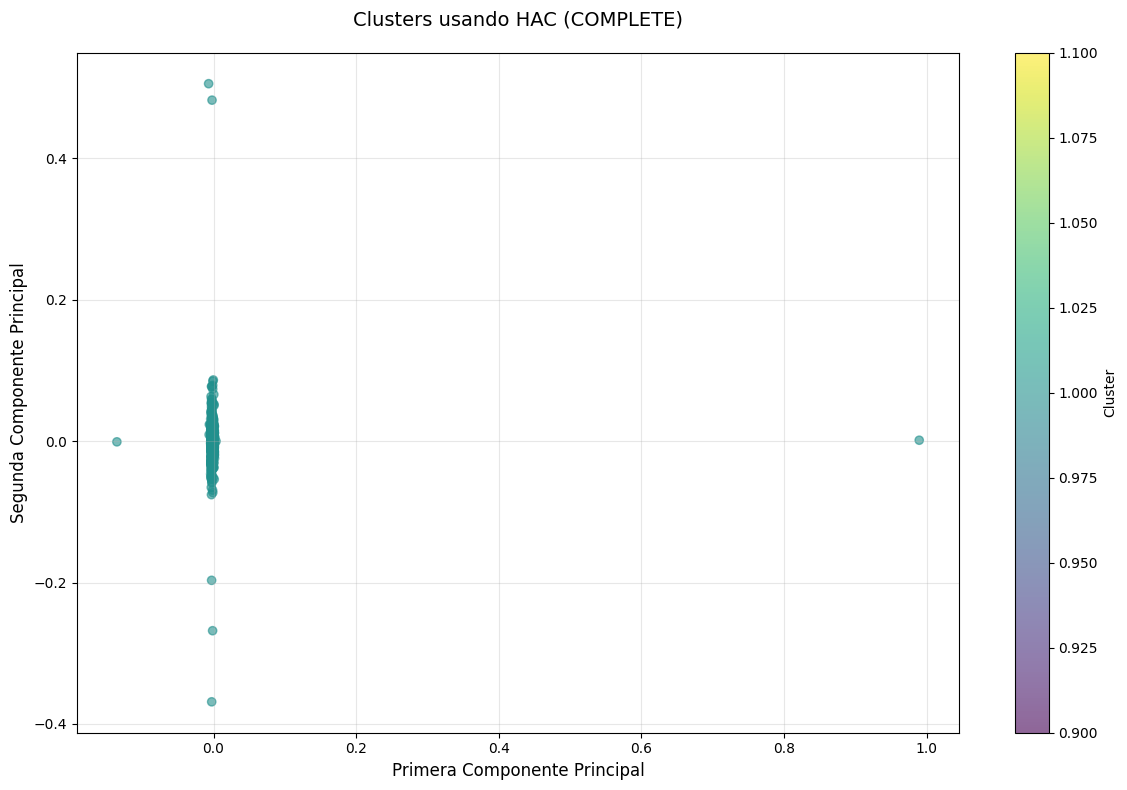


Número de elementos en cada cluster (complete):
1    440
Name: count, dtype: int64


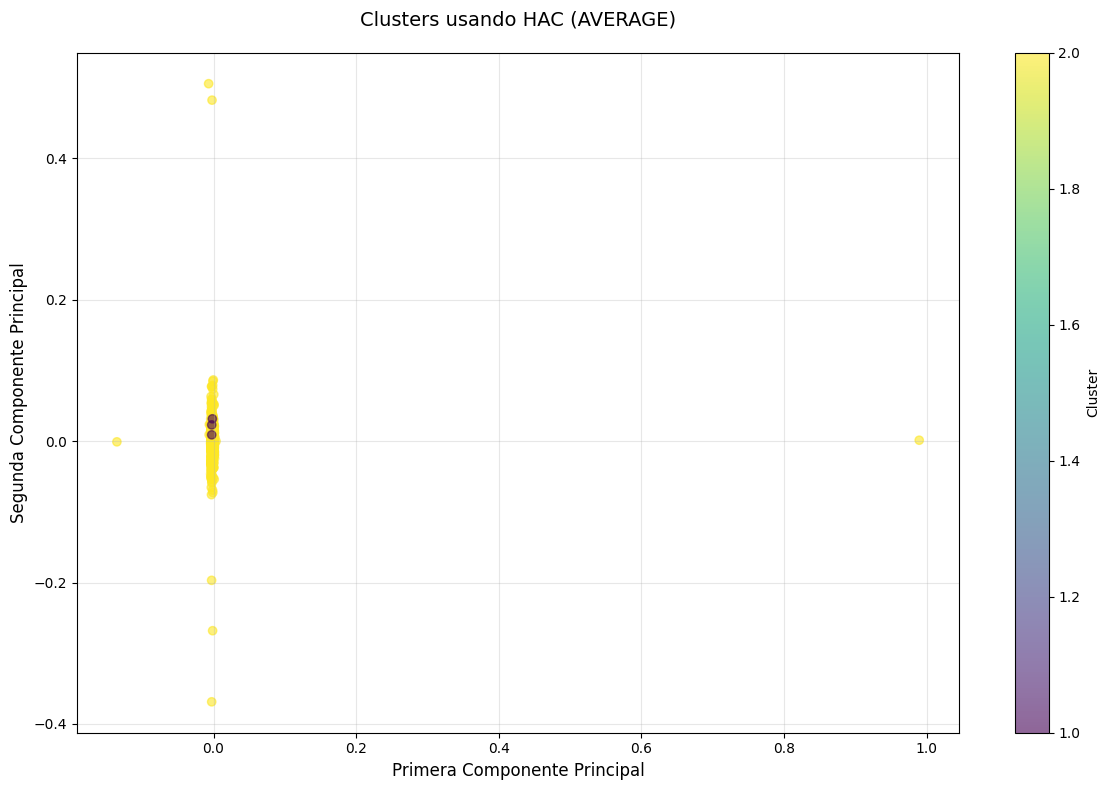


Número de elementos en cada cluster (average):
2    437
1      3
Name: count, dtype: int64


c:\Users\walt_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


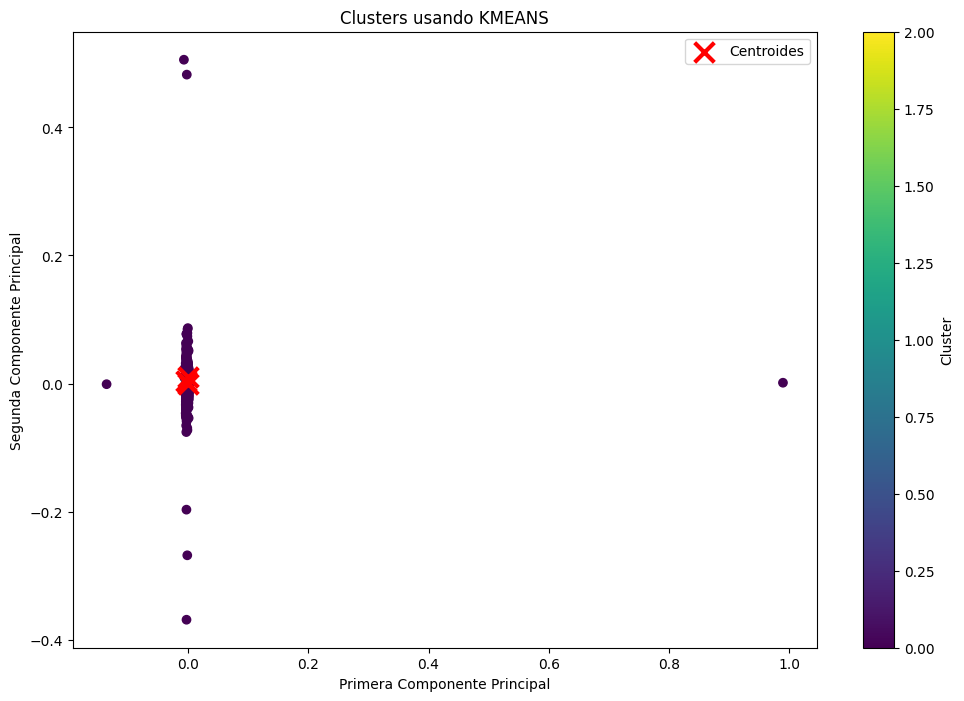

Inercia del clustering: 437.00

Número de elementos en cada cluster (K-means):
0    438
2      1
1      1
Name: count, dtype: int64


c:\Users\walt_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


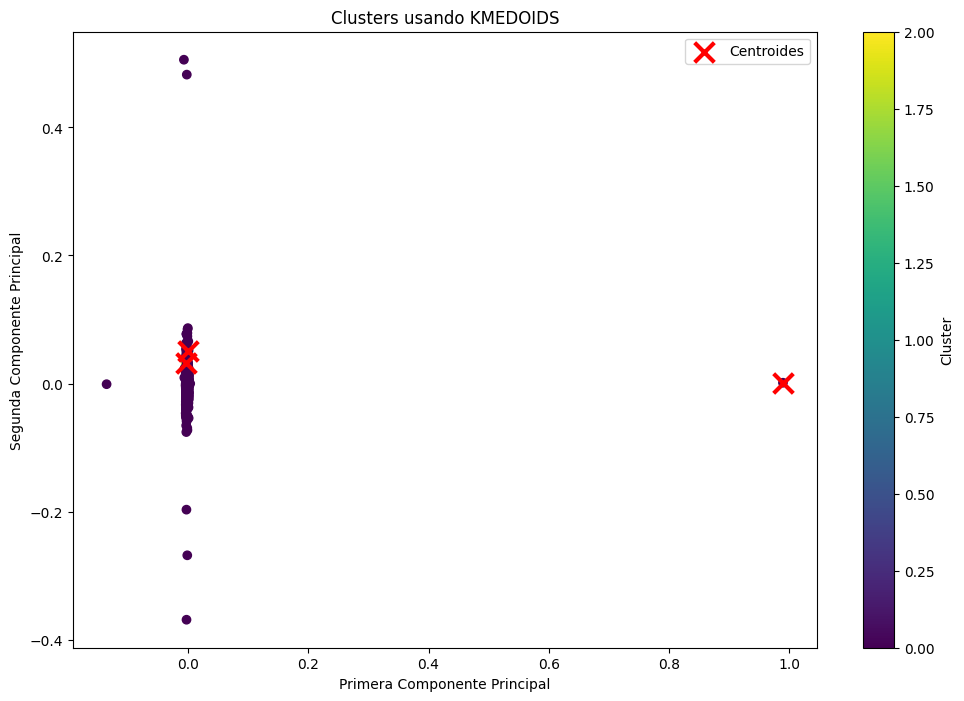

Inercia del clustering: 618.01

Número de elementos en cada cluster (K-medoids):
0    438
1      1
2      1
Name: count, dtype: int64

Varianza explicada por componente:
Componente 1: 0.23%
Componente 2: 0.23%

Varianza explicada acumulada: 0.46%

Primeras componentes principales:
        PC1       PC2
0  0.989501  0.001315
1  0.000665  0.050468
2 -0.003981  0.031371
3 -0.003996  0.012326
4 -0.000104  0.008227

Correlaciones con las variables:
                                                      PC1    PC2
Net_Income_to_Total_Assets,ROA(A)_before_intere...  0.000 -0.000
Net_Income_to_Total_Assets,ROA(A)_before_intere... -0.006 -0.000
Net_Income_to_Total_Assets,ROA(A)_before_intere... -0.000 -0.001
Net_Income_to_Total_Assets,ROA(A)_before_intere... -0.000  0.001
Net_Income_to_Total_Assets,ROA(A)_before_intere... -0.000  0.001
...                                                   ...    ...
Net_Income_to_Total_Assets,ROA(A)_before_intere... -0.000 -0.002
Net_Income_to_Total_Assets,ROA(A

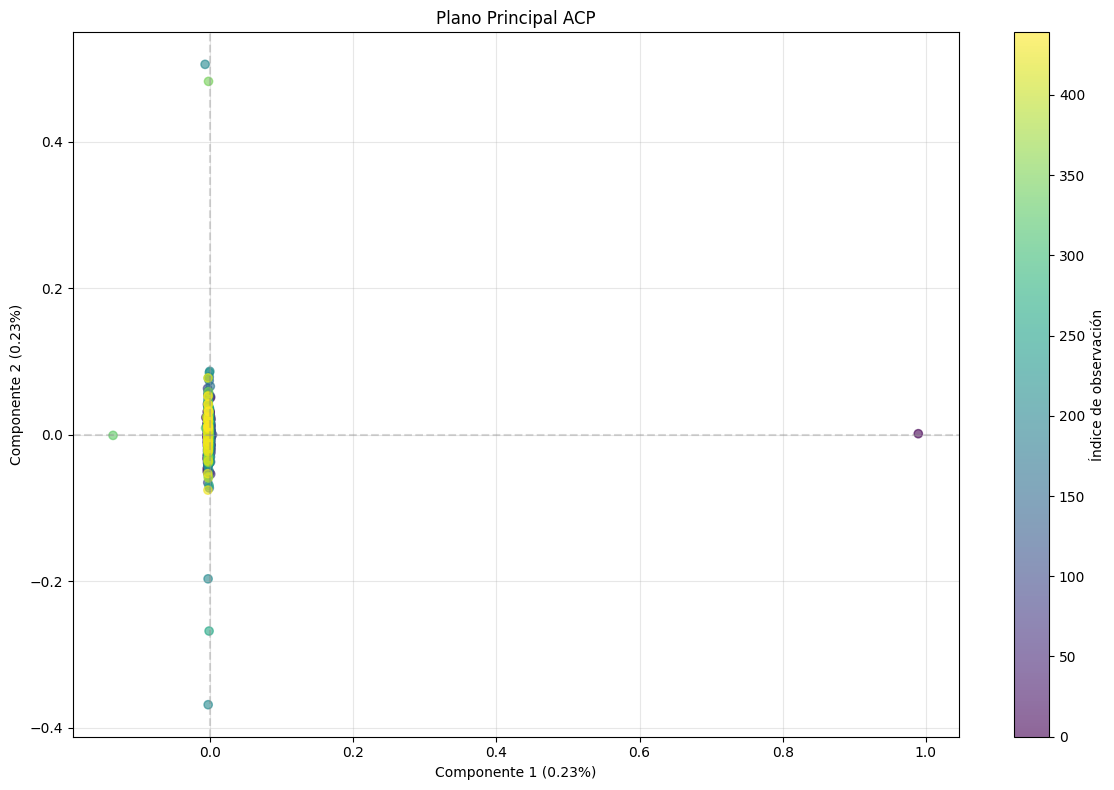

In [2]:

#file_path_clustering = 'BankChurners.csv'
file_path_clustering = 'downsampled_df.csv'
analisis_clustering = AnalisisDatosExploratorio(file_path_clustering, tipo_modelo='no_supervisado')
analisis_clustering.resumen_general()

# Normalización y clustering
datos_normalizados = analisis_clustering.normalizar_datos()
ns = NoSupervisados(df=datos_normalizados)

# Clustering jerárquico
for metodo in ['ward', 'complete', 'average']:
    clusters = ns.HAC(num_clusters=3, metodo=metodo)
    if clusters is not None:
        print(f"\nNúmero de elementos en cada cluster ({metodo}):")
        print(pd.Series(clusters).value_counts())

# K-means
clusters_kmeans = ns.KMEDIAS(n_clusters=3, metodo='kmeans')
if clusters_kmeans is not None:
    print("\nNúmero de elementos en cada cluster (K-means):")
    print(pd.Series(clusters_kmeans).value_counts())

# K-medoids
clusters_kmedoids = ns.KMEDIAS(n_clusters=3, metodo='kmedoids')
if clusters_kmedoids is not None:
    print("\nNúmero de elementos en cada cluster (K-medoids):")
    print(pd.Series(clusters_kmedoids).value_counts())

# ACP
coordenadas = ns.ACP(n_componentes=2)
if coordenadas is not None:
    ns.plot_plano_principal(titulo='Plano Principal ACP')



# === ANÁLISIS DE REGRESIÓN ===
# Configuración y análisis inicial


Datos cargados correctamente. Dimensiones: (440, 33)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 33 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Net_Income_to_Total_Assets                               440 non-null    float64
 1   ROA(A)_before_interest_and_%_after_tax                   440 non-null    float64
 2   ROA(B)_before_interest_and_depreciation_after_tax        440 non-null    float64
 3   ROA(C)_before_interest_and_depreciation_before_interest  440 non-null    float64
 4   Net_worth/Assets                                         440 non-null    float64
 5   Debt_ratio_%                                             440 non-null    float64
 6   Persistent_EPS_in_the_Last_Four_Seasons                  440 non-null    float64
 7   Retained_Earnings_to_Total_Assets    

,Net_Income_to_Total_Assets,ROA(A)_before_interest_and_%_after_tax,ROA(B)_before_interest_and_depreciation_after_tax,ROA(C)_before_interest_and_depreciation_before_interest,Net_worth/Assets,Debt_ratio_%,Persistent_EPS_in_the_Last_Four_Seasons,Retained_Earnings_to_Total_Assets,Net_profit_before_tax/Paid-in_capital,Per_Share_Net_profit_before_tax_(Yuan_¥),...,Operating_profit/Paid-in_capital,Liability-Assets_Flag,Total_expense/Assets,Equity_to_Long-term_Liability,CFO_to_Assets,Tax_rate_(A),Cash/Total_Assets,Gross_Profit_to_Sales,Operating_Gross_Margin,Bankrupt?
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.773796,0.511214,0.510182,0.464047,0.850735,0.149265,0.210659,0.918948,0.167026,0.167283,...,0.099175,0.013636,0.040217,0.122607,0.573891,0.079266,0.083910,0.603217,0.603219,0.500000
std,0.081859,0.108296,0.095765,0.088335,0.065482,0.065482,0.039847,0.054546,0.035483,0.036157,...,0.025109,0.116108,0.062755,0.057168,0.071905,0.148814,0.116165,0.014974,0.014974,0.500569
min,0.000000,0.000000,0.033514,0.024277,0.474590,0.001088,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001836,0.000000,0.000000,0.000000,0.000184,0.502622,0.502623,0.000000
25%,0.760255,0.475319,0.481584,0.432750,0.809527,0.102752,0.193675,0.910671,0.151755,0.152633,...,0.088109,0.000000,0.015438,0.110933,0.545833,0.000000,0.015779,0.596693,0.596696,0.000000
50%,0.795971,0.535706,0.525617,0.474846,0.846449,0.153551,0.211638,0.930192,0.169203,0.170181,...,0.096695,0.000000,0.025410,0.114622,0.576140,0.000000,0.043487,0.602160,0.602164,0.500000
75%,0.813196,0.565730,0.558756,0.506106,0.897248,0.190472,0.226624,0.939090,0.180735,0.181988,...,0.107650,0.000000,0.042124,0.120773,0.604035,0.121849,0.100138,0.610235,0.610235,1.000000
max,1.000000,0.954536,0.810268,0.754643,0.998912,0.525410,0.452208,0.998858,0.378260,0.380508,...,0.321535,1.000000,1.000000,0.922128,0.918971,0.999696,0.925018,0.665149,0.665151,1.000000


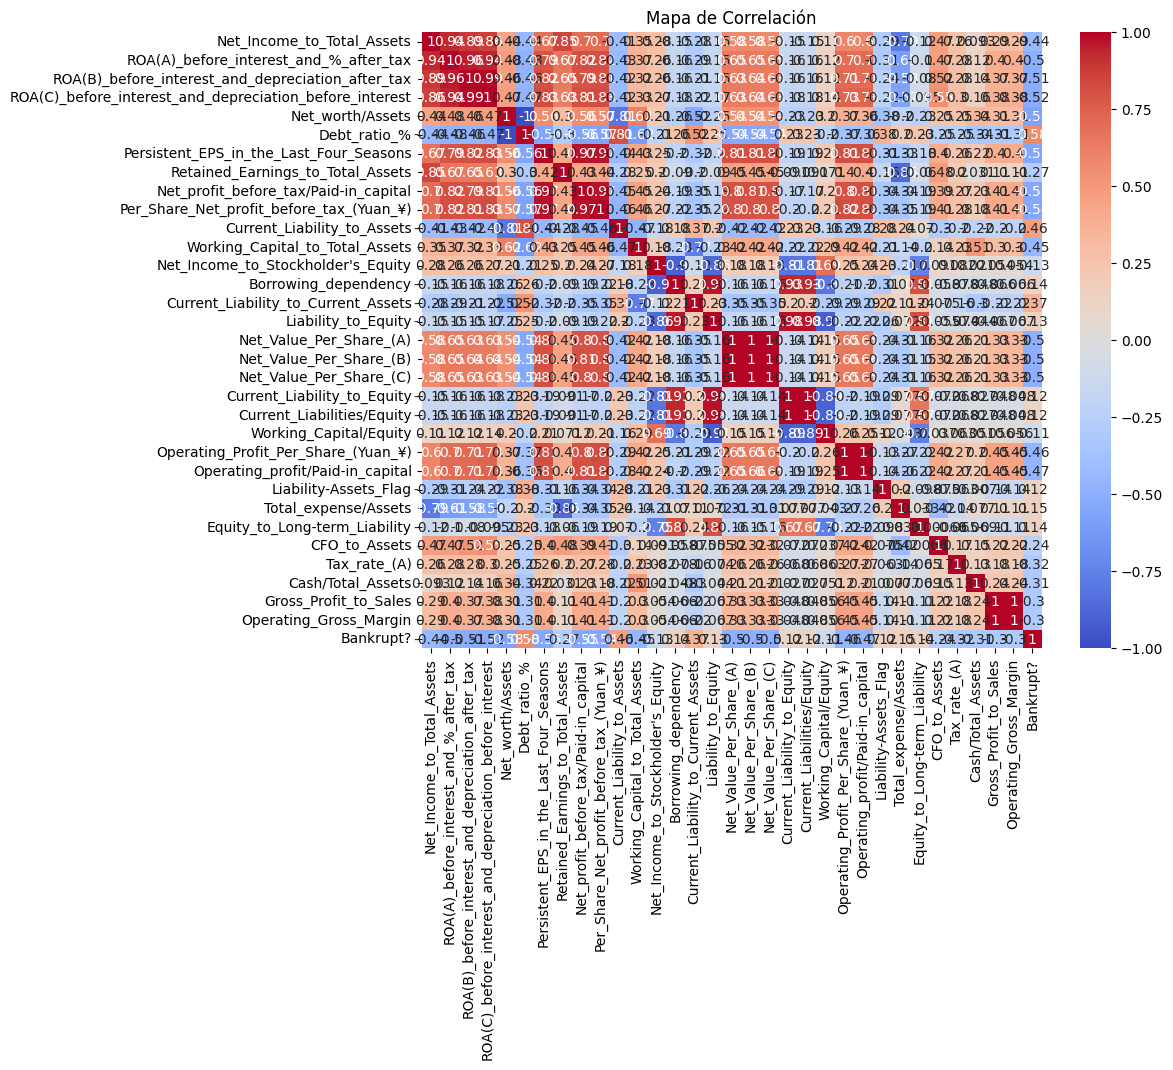


=== Regresión Simple ===
Coeficiente: -0.4407
Intercepto: 0.4929
{'R2': -0.05942703665750915, 'RMSE': 0.06128925535413546, 'MAE': 0.045862538999029194, 'ER': 32.32294715634366}

=== Comparación de Modelos ===


,Modelo,R2,RMSE,MAE,ER
0,Regresión Lineal,1.000000,4.010002e-16,3.136380e-16,2.210454e-13
1,Ridge,0.889660,1.977946e-02,1.654064e-02,1.165749e+01
2,Lasso,-0.027281,6.035226e-02,4.853988e-02,3.420988e+01
3,Árbol de Decisión,0.995965,3.782655e-03,2.735919e-03,1.928218e+00
4,Random Forest,0.998734,2.118972e-03,8.008923e-04,5.644519e-01
5,Gradient Boosting,0.999566,1.239824e-03,7.111595e-04,5.012102e-01


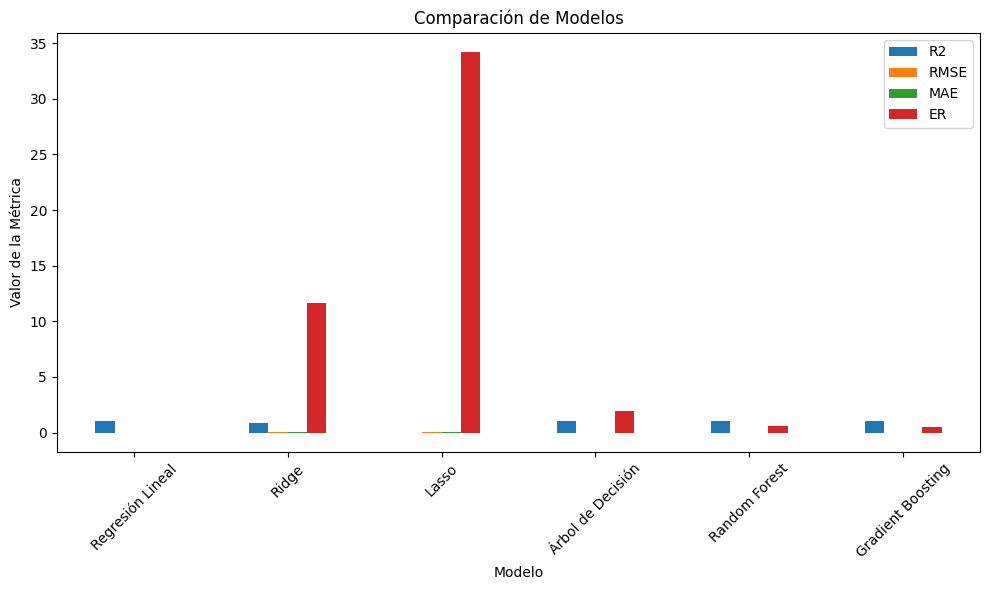

In [3]:
# Ejemplo de uso Supervisado
ruta_archivo = "downsampled_df.csv"
columna_objetivo = "Debt_ratio_%"

# Crear instancia y cargar datos
modelo = Supervisado(ruta_archivo, target_column=columna_objetivo)

# Análisis exploratorio
modelo.resumen_general()
modelo.graficar_relaciones()

# Modelado
print("\n=== Regresión Simple ===")
resultados_simple = modelo.regresion_simple()  # Usa la primera columna numérica
print(resultados_simple)

print("\n=== Comparación de Modelos ===")
resultados_comparacion = modelo.comparar_modelos()



# === ANÁLISIS DE CLASIFICACIÓN ===
# Configuración y análisis


EDA del dataset

Shape de los datos: (440, 33)

Primeras 10 filas de los datos:    Net_Income_to_Total_Assets  ROA(A)_before_interest_and_%_after_tax  \
0                    0.801098                                0.540667   
1                    0.808595                                0.554187   
2                    0.806939                                0.550425   
3                    0.771691                                0.498528   
4                    0.837382                                0.613607   

   ROA(B)_before_interest_and_depreciation_after_tax  \
0                                           0.523636   
1                                           0.558702   
2                                           0.556936   
3                                           0.503346   
4                                           0.596445   

   ROA(C)_before_interest_and_depreciation_before_interest  Net_worth/Assets  \
0                                           0.471945            

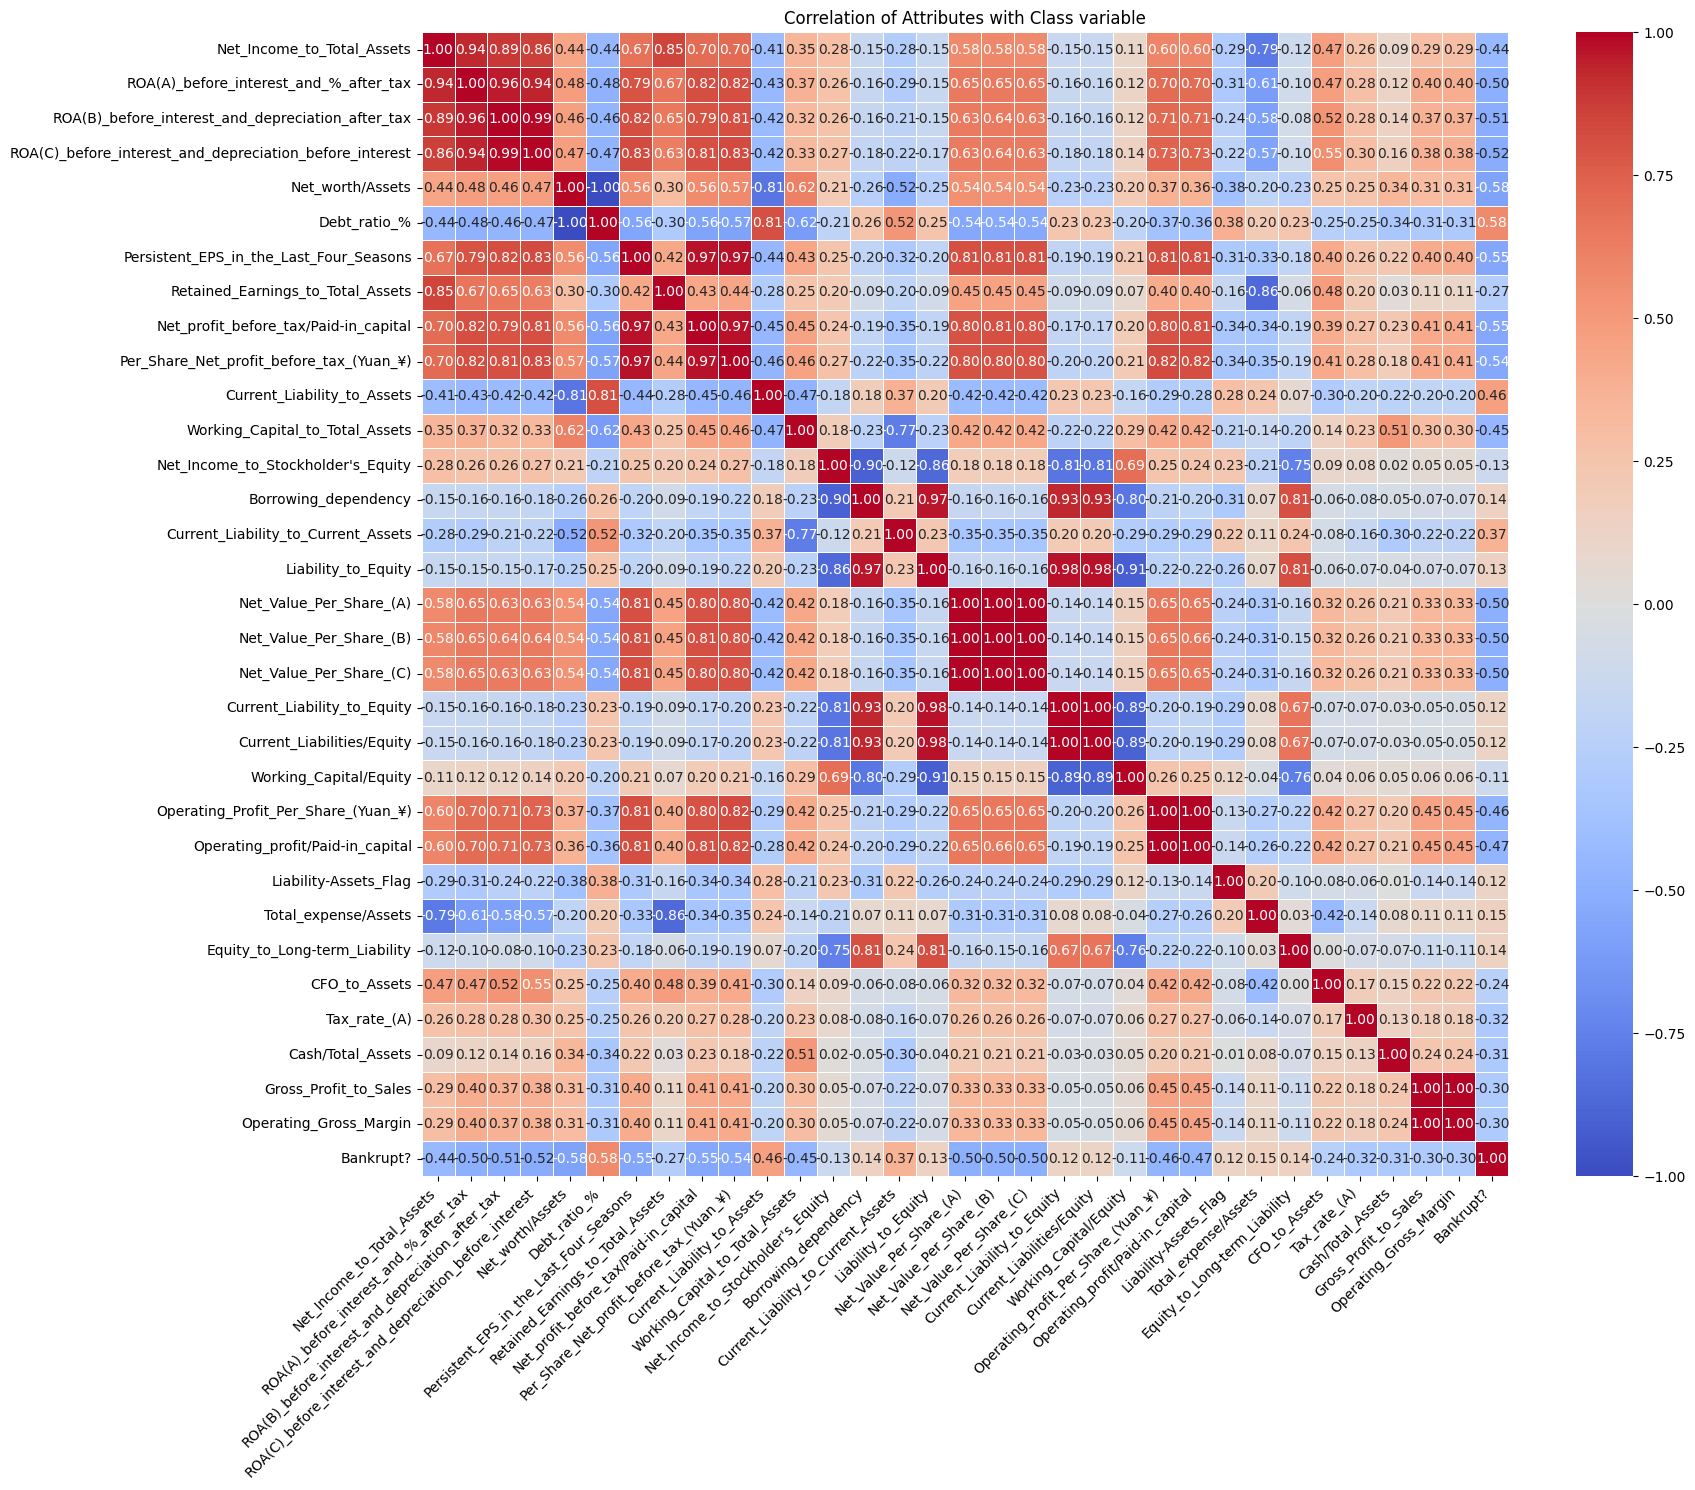

Evaluando modelo: KNN



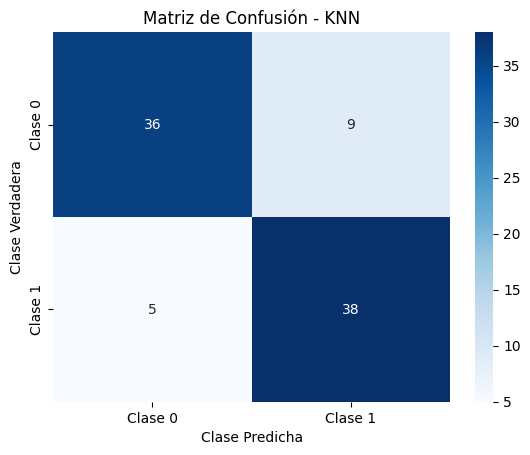

Accuracy: 0.8409090909090909
AUC: 0.8839793281653746

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84        45
         1.0       0.81      0.88      0.84        43

    accuracy                           0.84        88
   macro avg       0.84      0.84      0.84        88
weighted avg       0.84      0.84      0.84        88


Evaluando modelo: Naive Bayes



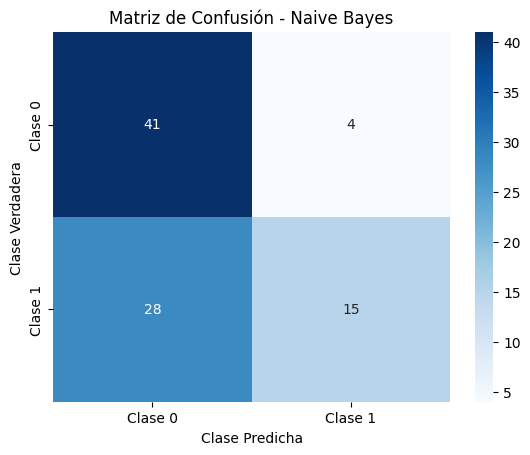

Accuracy: 0.6363636363636364
AUC: 0.8708010335917313

Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.91      0.72        45
         1.0       0.79      0.35      0.48        43

    accuracy                           0.64        88
   macro avg       0.69      0.63      0.60        88
weighted avg       0.69      0.64      0.60        88


Evaluando modelo: Logistic Regression



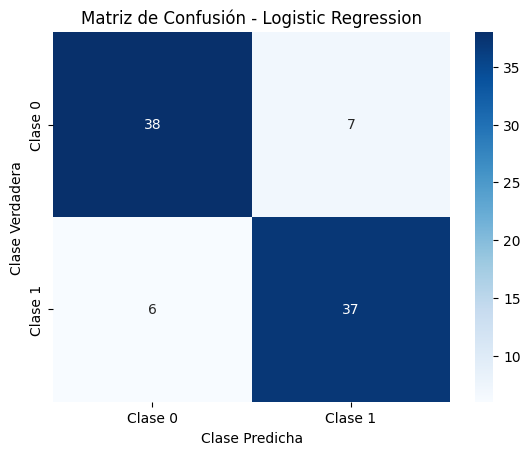

Accuracy: 0.8522727272727273
AUC: 0.9074935400516796

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        45
         1.0       0.84      0.86      0.85        43

    accuracy                           0.85        88
   macro avg       0.85      0.85      0.85        88
weighted avg       0.85      0.85      0.85        88


Evaluando modelo: Decision Tree 3



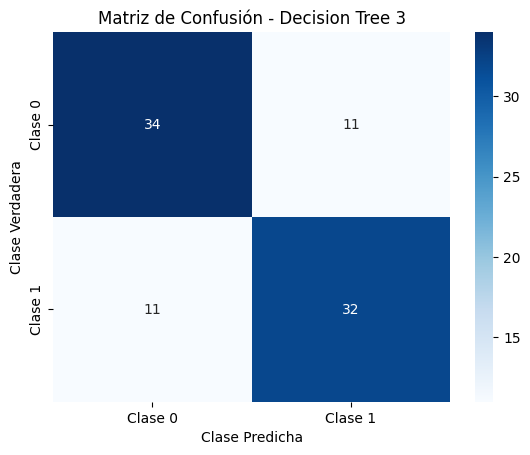

Accuracy: 0.75
AUC: 0.7558139534883721

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        45
         1.0       0.74      0.74      0.74        43

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.75      0.75      0.75        88


Evaluando modelo: Random Forest



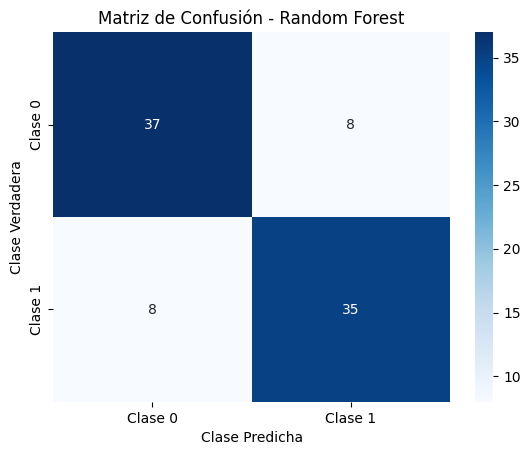

Accuracy: 0.8181818181818182
AUC: 0.9062015503875969

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        45
         1.0       0.81      0.81      0.81        43

    accuracy                           0.82        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.82      0.82      0.82        88


Evaluando modelo: SVM



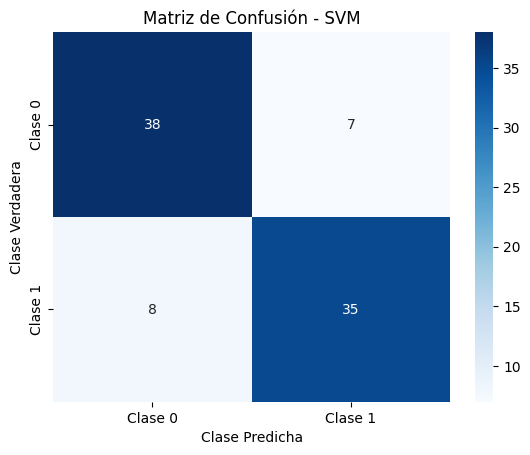

Accuracy: 0.8295454545454546
AUC: 0.9077519379844962

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84        45
         1.0       0.83      0.81      0.82        43

    accuracy                           0.83        88
   macro avg       0.83      0.83      0.83        88
weighted avg       0.83      0.83      0.83        88



Resumen de Resultados:
                Modelo  Accuracy       AUC  Precision    Recall  F1-Score
0                  KNN  0.840909  0.883979   0.844070  0.840909  0.840745
1          Naive Bayes  0.636364  0.870801   0.689619  0.636364  0.604260
2  Logistic Regression  0.852273  0.907494   0.852531  0.852273  0.852292
3      Decision Tree 3  0.750000  0.755814   0.750000  0.750000  0.750000
4        Random Forest  0.818182  0.906202   0.818182  0.818182  0.818182
5                  SVM  0.829545  0.907752   0.829628  0.829545  0.829479


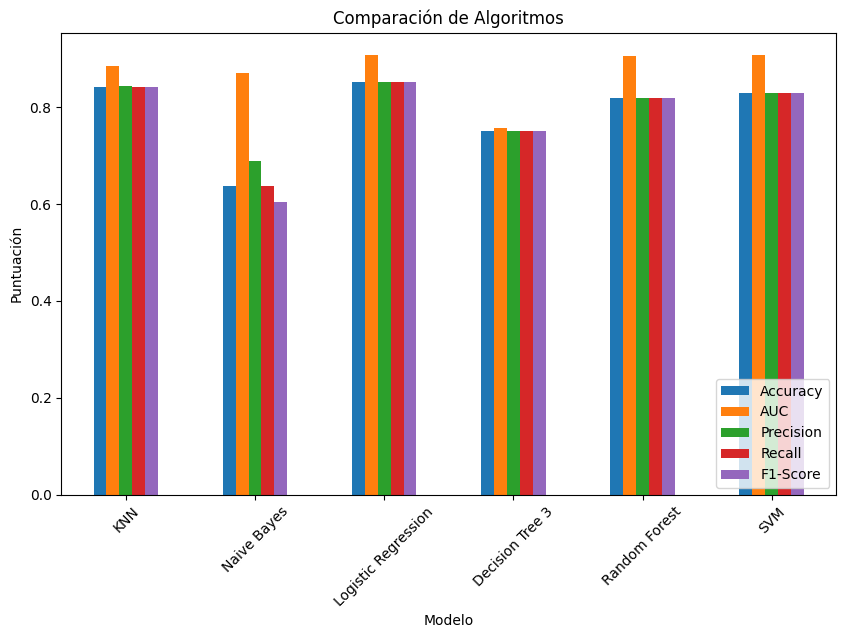

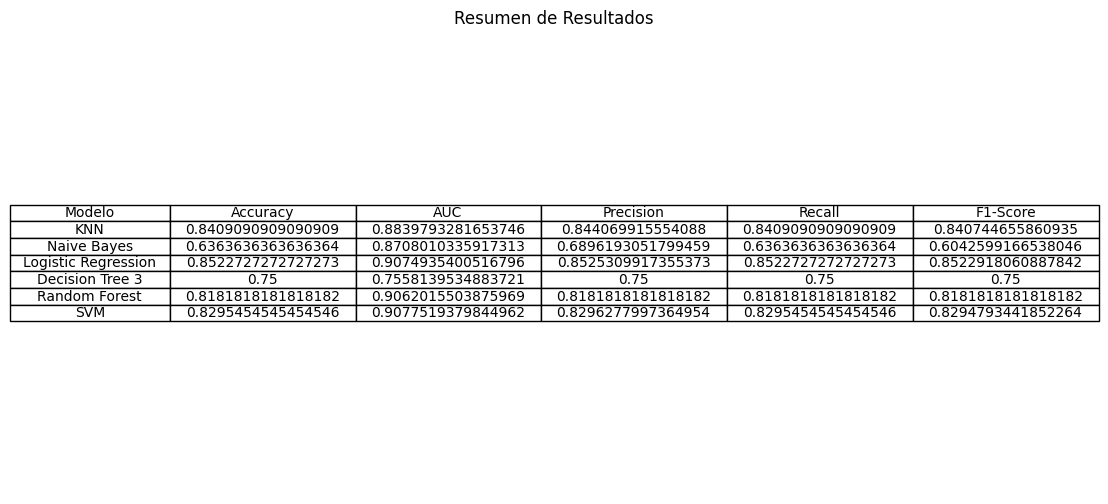

In [4]:
file_path = 'downsampled_df.csv'
evaluador_clasificacion = evaluador(file_path)
evaluador_clasificacion.EDA()
evaluador_clasificacion.comparar_algoritmos()